In [11]:
# import all needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor


# import the cleaned dataset from a csv file
data = pd.read_csv(r'data_cleaned.csv')


In [3]:
print("Shape of the dataset:")
data.shape

Shape of the dataset:


(1700, 18)

In [4]:
print("available columns and their data types:")
data.dtypes

available columns and their data types:


,0
country,object
year,int64
cereal_yield,float64
fdi_perc_gdp,float64
en_per_gdp,float64
en_per_cap,float64
co2_ttl,float64
co2_per_cap,float64
co2_per_gdp,float64
pop_urb_aggl_perc,float64


In [5]:
print("Overview of the first 5 rows:")
data.head()

Overview of the first 5 rows:


,country,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,AGO,1991,417.4,5.449515,179.271884,565.451027,4367.397,0.409949,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,10653515.0,6.687032,4099472.572
1,AGO,1992,397.0,4.982460,193.632183,550.548264,4418.735,0.401597,141.244823,15.660630,12.399823,5.779394e+09,470.0,235.3,3.226990,11002910.0,6.750459,4385759.926
2,AGO,1993,267.8,5.715529,266.318379,551.688878,5801.194,0.510141,246.261769,16.025739,12.399823,5.285600e+09,310.0,231.1,3.297243,11371750.0,6.700777,4689709.700
3,AGO,1994,298.4,4.195018,260.830190,541.553067,3890.687,0.331321,159.575256,16.065941,12.399824,4.059577e+09,190.0,226.3,3.212170,11742960.0,6.503667,5004849.552
4,AGO,1995,402.2,9.374417,237.623934,528.386164,11012.001,0.909699,409.106543,16.134424,12.399825,5.039535e+09,320.0,221.5,3.037335,12105105.0,6.223936,5326246.200


In [6]:
print("Descriptive statistics:")
data.describe().T

Descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
year,1700.0,1.999571e+03,5.143070e+00,1.991000e+03,1.995000e+03,2.000000e+03,2.004000e+03,2.008000e+03
cereal_yield,1700.0,3.013318e+03,1.796206e+03,1.757000e+02,1.683365e+03,2.584800e+03,3.933400e+03,8.410800e+03
fdi_perc_gdp,1700.0,2.948940e+00,3.949722e+00,-1.502768e+01,8.341052e-01,1.993220e+00,3.702149e+00,5.137395e+01
en_per_gdp,1700.0,2.498227e+02,1.861950e+02,6.633537e+01,1.363205e+02,1.976249e+02,2.864749e+02,1.383380e+03
en_per_cap,1700.0,1.968980e+03,1.959420e+03,1.165115e+02,5.428828e+02,1.089226e+03,2.893996e+03,1.260784e+04
co2_ttl,1700.0,9.793999e+05,3.235692e+06,7.077310e+02,1.462125e+04,7.728386e+04,3.708446e+05,3.064936e+07
co2_per_cap,1700.0,4.676663e+00,4.906273e+00,2.941071e-02,9.227695e-01,3.093346e+00,7.441195e+00,3.710650e+01
co2_per_gdp,1700.0,4.823038e+02,3.921922e+02,4.555259e+01,2.571396e+02,3.684156e+02,5.869730e+02,3.343454e+03
pop_urb_aggl_perc,1700.0,2.148013e+01,1.210516e+01,3.526316e+00,1.238395e+01,1.852596e+01,2.898832e+01,6.050578e+01
prot_area_perc,1700.0,1.220179e+01,9.116682e+00,0.000000e+00,5.839844e+00,1.029379e+01,1.659930e+01,5.374983e+01


In [7]:
# 🧹 Data Inspection
data.info()
print("\nMissing values:\n", data.isnull().sum())
print(data.describe().T)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              1700 non-null   object 
 1   year                 1700 non-null   int64  
 2   cereal_yield         1700 non-null   float64
 3   fdi_perc_gdp         1700 non-null   float64
 4   en_per_gdp           1700 non-null   float64
 5   en_per_cap           1700 non-null   float64
 6   co2_ttl              1700 non-null   float64
 7   co2_per_cap          1700 non-null   float64
 8   co2_per_gdp          1700 non-null   float64
 9   pop_urb_aggl_perc    1700 non-null   float64
 10  prot_area_perc       1700 non-null   float64
 11  gdp                  1700 non-null   float64
 12  gni_per_cap          1700 non-null   float64
 13  under_5_mort_rate    1700 non-null   float64
 14  pop_growth_perc      1700 non-null   float64
 15  pop                  1700 non-null   f

,country,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,AGO,1991,417.4,5.449515,179.271884,565.451027,4367.397,0.409949,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,10653515.0,6.687032,4099472.572
1,AGO,1992,397.0,4.982460,193.632183,550.548264,4418.735,0.401597,141.244823,15.660630,12.399823,5.779394e+09,470.0,235.3,3.226990,11002910.0,6.750459,4385759.926
2,AGO,1993,267.8,5.715529,266.318379,551.688878,5801.194,0.510141,246.261769,16.025739,12.399823,5.285600e+09,310.0,231.1,3.297243,11371750.0,6.700777,4689709.700
3,AGO,1994,298.4,4.195018,260.830190,541.553067,3890.687,0.331321,159.575256,16.065941,12.399824,4.059577e+09,190.0,226.3,3.212170,11742960.0,6.503667,5004849.552
4,AGO,1995,402.2,9.374417,237.623934,528.386164,11012.001,0.909699,409.106543,16.134424,12.399825,5.039535e+09,320.0,221.5,3.037335,12105105.0,6.223936,5326246.200


In [8]:
# 🔧 Feature Engineering
if 'en_ttl' not in data.columns:
    data['en_ttl'] = data['en_per_gdp'] * data['gdp'] / 1000
if 'en_ttl_million' not in data.columns:
    data['en_ttl_million'] = data['en_ttl'] / 1e6


In [9]:
# 🧠 VIF Calculation with Scaling
features_for_vif = data[['cereal_yield','fdi_perc_gdp','gni_per_cap',
                          'en_per_gdp', 'en_per_cap', 'en_ttl_million',
                          'co2_per_cap', 'co2_per_gdp', 'gdp', 'pop']].dropna()


In [12]:
# Scale features to improve VIF accuracy
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features_for_vif), columns=features_for_vif.columns)

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

vif_result = calculate_vif(features_scaled)
print(vif_result)

          feature         VIF
0    cereal_yield    2.020228
1    fdi_perc_gdp    1.010640
2     gni_per_cap    3.894154
3      en_per_gdp    1.811762
4      en_per_cap   13.967375
5  en_ttl_million  109.526811
6     co2_per_cap   12.435204
7     co2_per_gdp    2.154944
8             gdp   85.895205
9             pop    5.448678


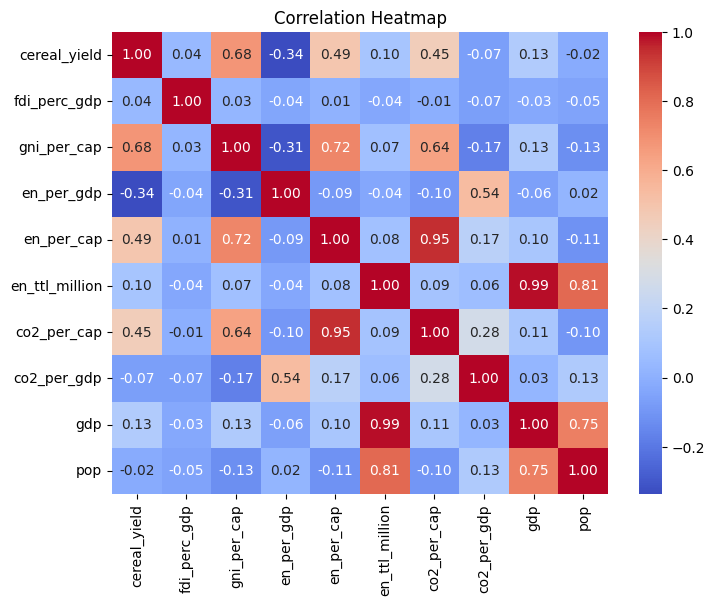

In [23]:
# 📈 Simple Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(features_scaled.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


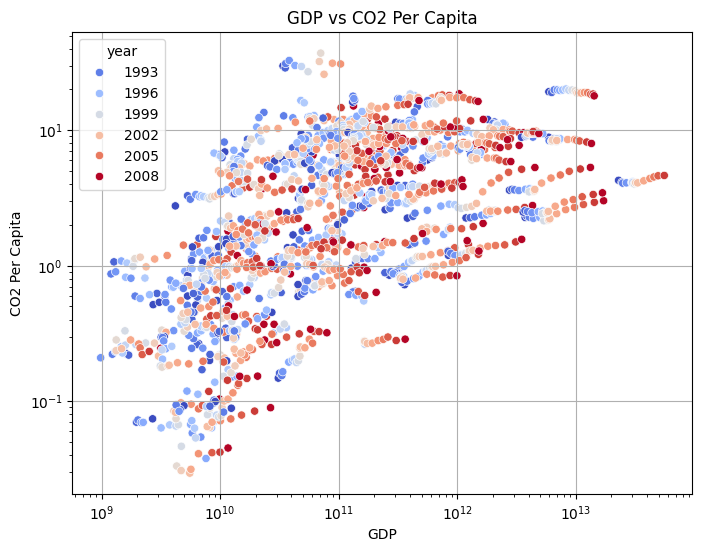

In [14]:
# Scatter Plot: GDP vs CO2 Per Capita
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='gdp', y='co2_per_cap', hue='year', palette='coolwarm')
plt.title('GDP vs CO2 Per Capita')
plt.xlabel('GDP')
plt.ylabel('CO2 Per Capita')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()


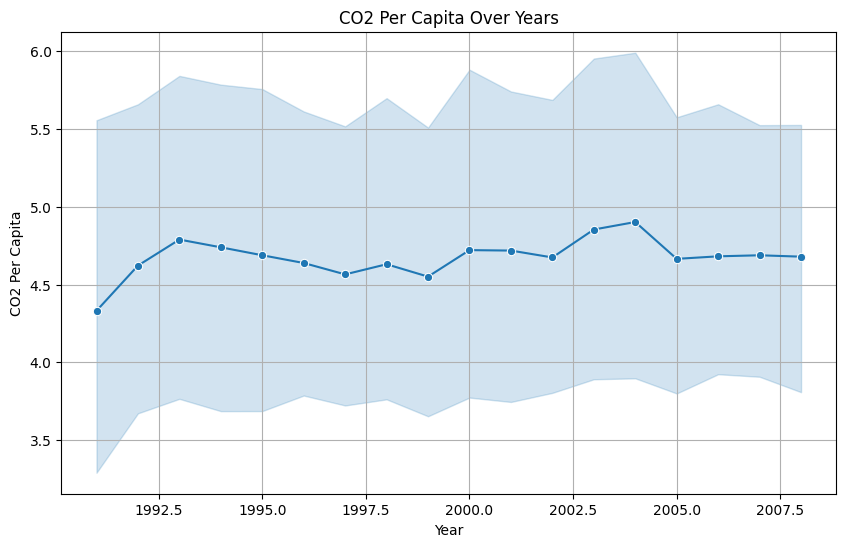

In [15]:
# Line Plot: CO2 Per Capita Over Time
plt.figure(figsize=(10,6))
sns.lineplot(data=data.sort_values('year'), x='year', y='co2_per_cap', marker='o')
plt.title('CO2 Per Capita Over Years')
plt.xlabel('Year')
plt.ylabel('CO2 Per Capita')
plt.grid(True)
plt.show()

/tmp/ipython-input-16-642065405.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='co2_per_cap', y='country', palette='viridis')


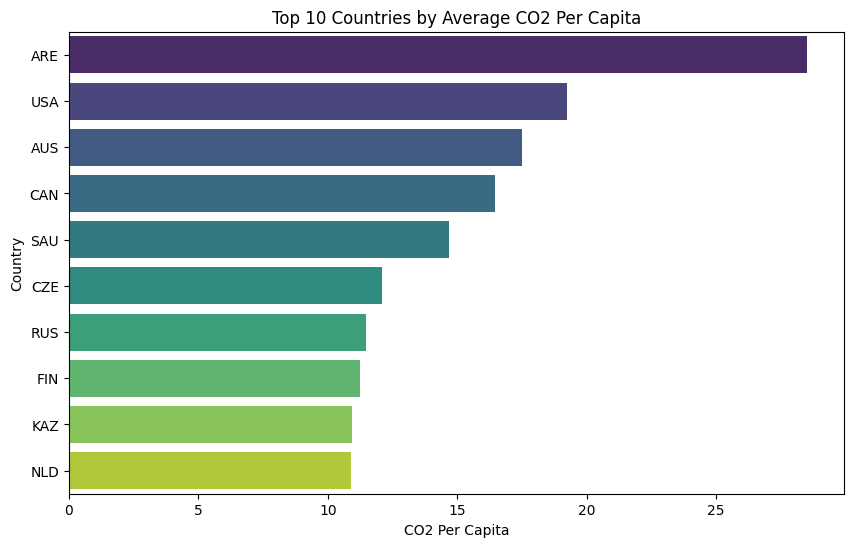

In [16]:
# Bar Plot: Average CO2 Per Capita by Country (Top 10)
top_countries = data.groupby('country')['co2_per_cap'].mean().nlargest(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=top_countries, x='co2_per_cap', y='country', palette='viridis')
plt.title('Top 10 Countries by Average CO2 Per Capita')
plt.xlabel('CO2 Per Capita')
plt.ylabel('Country')
plt.show()

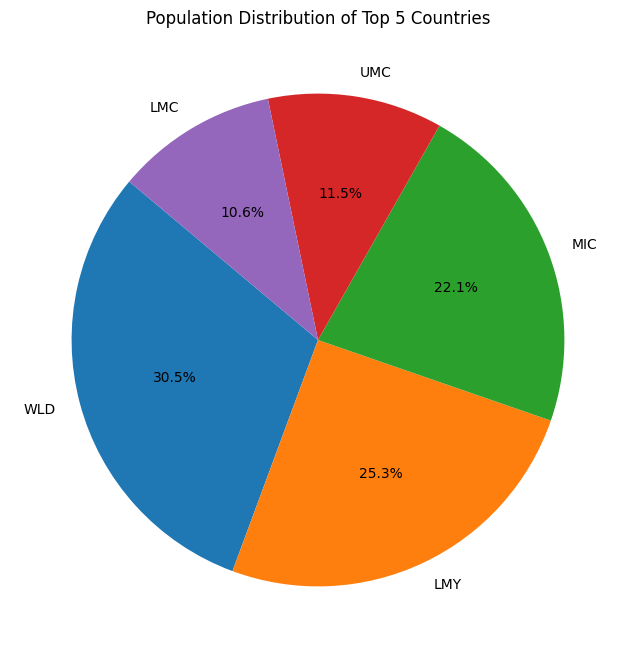

In [17]:
# Pie Chart: Population Distribution for Top 5 Countries
pop_distribution = data.groupby('country')['pop'].mean().nlargest(5)
plt.figure(figsize=(8,8))
plt.pie(pop_distribution, labels=pop_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Population Distribution of Top 5 Countries')
plt.show()

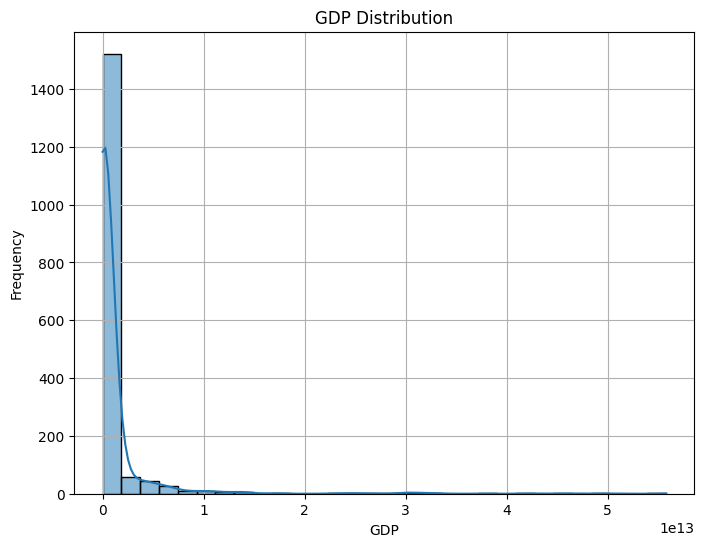

In [18]:
# Histogram: GDP Distribution
plt.figure(figsize=(8,6))
sns.histplot(data['gdp'], bins=30, kde=True)
plt.title('GDP Distribution')
plt.xlabel('GDP')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


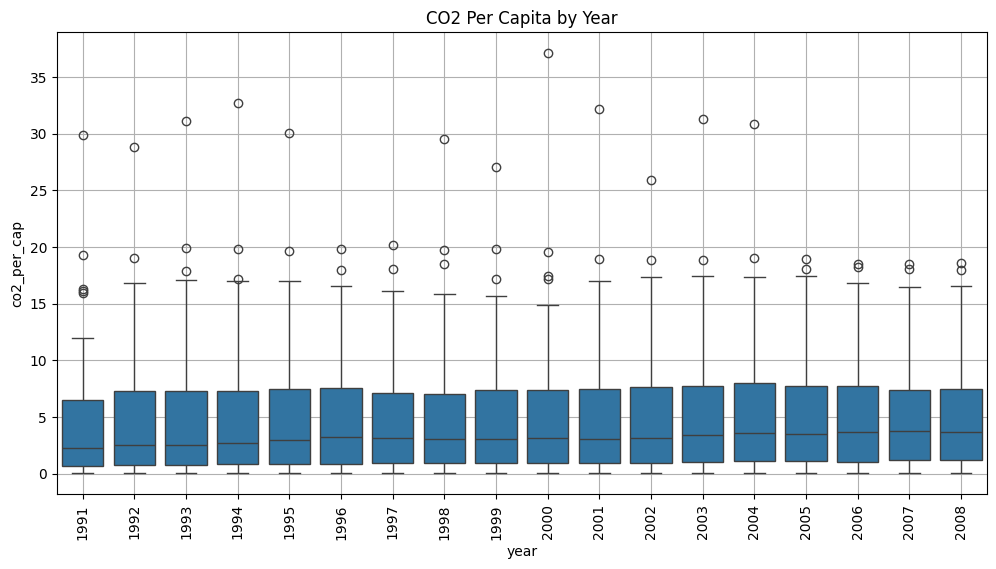

In [19]:
# Boxplot: CO2 Per Capita by Year
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x='year', y='co2_per_cap')
plt.title('CO2 Per Capita by Year')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()